In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import missingno
! pip3 install fuzzywuzzy
import fuzzywuzzy
from fuzzywuzzy import process
import collections
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
best_books = pd.read_csv('drive/MyDrive/Data_Science/books.csv')
best_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
best_books.shape

(550, 7)

In [ ]:
best_books.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [ ]:
best_books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
best_books.info() #check nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


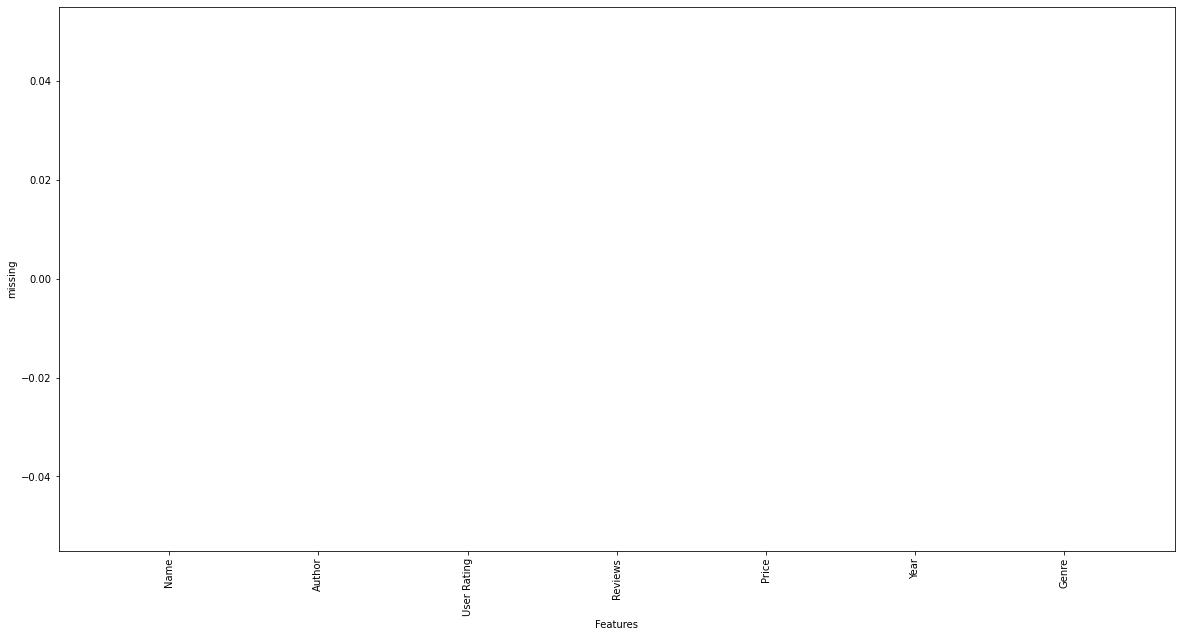

In [ ]:
#BarGraph of missing values for clearer visualisation
null = best_books.isnull().sum()

from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(null)),null)
plt.xlabel('Features')
plt.ylabel('missing')
plt.xticks(list(range(len(best_books.columns))), list(best_books.columns.values), rotation='vertical')
plt.show

print(null)

In [ ]:
# Change the data type
best_books.Genre = best_books.Genre.astype('category')

In [ ]:
from scipy.stats import ttest_1samp
user_rating_mean = np.mean(best_books['User Rating'])
print(user_rating_mean)

4.618363636363641


In [ ]:
sample = best_books['User Rating'].sample(n=100)
tset, pval = ttest_1samp(sample, user_rating_mean)
print(pval)

0.1931554572514861


In [ ]:
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

we are accepting null hypothesis


In [ ]:
# Create distplot with curve_type set to 'normal'
fig_10 = ff.create_distplot([sample], 
                         ['User Rating'], 
                         colors=['salmon'],
                         bin_size=.1, 
                         show_rug=False)

# Add title
fig_10.update_layout(title_text='Distribution Of User Rating', 
                     template='simple_white',
                     font=dict(family='Arial', size=12, color='black'))
fig_10.show()

# Conclusion
Hence descriptive analysis is performed by evaluating mean, variance, standard deviaton, skewness, etc. of features present in the dataset. The hypothesis testing is performed for testing the independence between two categorical variables. Normality test is performed for numerical attributes by using histogram distribution for visual test.
